<a href="https://colab.research.google.com/github/MTBXC/MTBXC/blob/main/Titanic_LGBM_from_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

titanic_path = kagglehub.competition_download('titanic')

print('Data source import complete.')


Data source import complete.


In [6]:
import os

# List files in the downloaded directory
print(f"Files in the downloaded directory ({titanic_path}):")
for dirname, _, filenames in os.walk(titanic_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Files in the downloaded directory (/root/.cache/kagglehub/competitions/titanic):
/root/.cache/kagglehub/competitions/titanic/gender_submission.csv
/root/.cache/kagglehub/competitions/titanic/train.csv
/root/.cache/kagglehub/competitions/titanic/test.csv


In [7]:
from google.colab import files
files.upload()  # Wybierz plik kaggle.json z dysku

{}

In [8]:
!mkdir -p ~/.kaggle          # Tworzy folder .kaggle w katalogu domowym
!mv kaggle.json ~/.kaggle/  # Przenosi plik do tego folderu
!chmod 600 ~/.kaggle/kaggle.json  # Ustawia odpowiednie uprawnienia

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
!pip install -q kaggle

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
train_data = pd.read_csv(os.path.join(titanic_path, "train.csv"))
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
train_data.shape

(891, 12)

In [18]:
train_data.Age.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


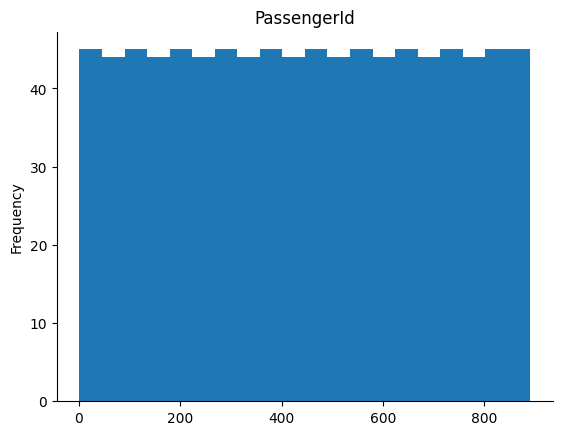

In [13]:
# @title PassengerId

from matplotlib import pyplot as plt
train_data['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
test_data = pd.read_csv(os.path.join(titanic_path, "test.csv"))
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

In [ ]:
train_data.shape

In [ ]:
train_data.info()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Prepare data (same as before)
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Initialize KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Store predictions from each fold
oof_predictions = np.zeros(len(train_data))
test_predictions = np.zeros(len(test_data))
models = []
oof_scores = []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Initialize and train LightGBM model
    lgbm = lgb.LGBMClassifier(random_state=1)
    lgbm.fit(X_train, y_train,
             eval_set=[(X_val, y_val)],
             early_stopping_rounds=10, # Optional: stop early if validation score doesn't improve
             verbose=False) # Set to True for more detailed output during training

    # Make predictions
    val_preds = lgbm.predict(X_val)
    test_preds = lgbm.predict(X_test)

    # Store predictions and score
    oof_predictions[val_index] = val_preds
    test_predictions += test_preds / n_splits # Average predictions across folds
    models.append(lgbm)

    score = accuracy_score(y_val, val_preds)
    oof_scores.append(score)
    print(f"Fold {fold+1} OOF Accuracy: {score}")

# Evaluate overall OOF predictions
overall_oof_accuracy = accuracy_score(y, oof_predictions)
print(f"\nOverall OOF Accuracy: {overall_oof_accuracy}")
print(f"Average Fold OOF Accuracy: {np.mean(oof_scores)}")

# Create submission file using averaged test predictions
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_predictions.round().astype(int)})
output.to_csv('submission_lgbm_kf.csv', index=False)

print("\nYour LightGBM with KFold submission was successfully saved!")

Fold 1/5
[LightGBM] [Info] Number of positive: 269, number of negative: 443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377809 -> initscore=-0.498858
[LightGBM] [Info] Start training from score -0.498858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
!kaggle competitions submit -c titanic -f submission_lgbm_kf.csv -m "Submission using Google Colab with LGBM"


100% 2.77k/2.77k [00:00<00:00, 4.56kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster